In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

In [22]:
# Calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    print("Distance\n\n", distance)
    return np.sqrt(distance)


# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda tup: tup[0])
    print("\n\nAll Distances\n\n", all_distances)
    return all_distances



# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    print("\n\nNeighbours\n\n", distances[:count])
    return distances[:count]




# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 13)
    
    op = [row[-1] for row in neighbours]
    prediction = max(set(op), key=op.count)
    print("\n\nOutput\n\n",op)
    print("\n\nPred\n\n", prediction)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [18]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
Y = pd.DataFrame(wine.target, columns=['target'])

In [19]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [20]:
np.sqrt(178)

13.341664064126334

In [9]:
X = (X-X.min()) / (X.max()-X.min())

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)

In [11]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [12]:
f1 = 'hue'
f2 = 'proline'
basex = np.array(xtrain[[f1, f2]])
basey = np.array(ytrain)

xtest = np.array(xtest[[f1, f2]])
ytest = np.array(ytest)

In [13]:
x = pd.DataFrame(basex)
y = basey

In [14]:
y = y.ravel()

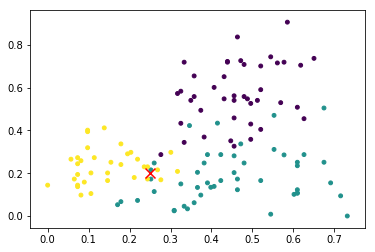

In [15]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [23]:
print(accuracy(basex,basey,xtest,ytest))

Distance

 0.24712364269189863
Distance

 0.3670509047690958
Distance

 0.1579051136085769
Distance

 0.10741008217174744
Distance

 0.1138870167789305
Distance

 0.013041230164746625
Distance

 0.0514241970287818
Distance

 0.18032354149984267
Distance

 0.06527722963880762
Distance

 0.18679373306638108
Distance

 0.05773354803272668
Distance

 0.014608178542955055
Distance

 0.020531463416717723
Distance

 0.06693700080274431
Distance

 0.10241010404908449
Distance

 0.21827569373433642
Distance

 0.3264010571530109
Distance

 0.04127340885540737
Distance

 0.09186412443646175
Distance

 0.2541064939300948
Distance

 0.29861086846394264
Distance

 0.11444496981528679
Distance

 0.016283934542039573
Distance

 0.05892246337071013
Distance

 0.0228697651429995
Distance

 0.1008533640187611
Distance

 0.3437538792147349
Distance

 0.17045597875520527
Distance

 0.0478179620817948
Distance

 0.17108418135407366
Distance

 0.03548691887649868
Distance

 0.07747757103881896
Distance

 0.2

Distance

 0.6735237286980198
Distance

 0.1750027320845459
Distance

 0.507642626400973
Distance

 0.18011003233611653
Distance

 0.4938008172838586
Distance

 0.8270423624131478
Distance

 0.5718953012498411
Distance

 0.3545481314959854
Distance

 0.3942399851230933
Distance

 0.12989443036220927
Distance

 0.5500608621679384
Distance

 0.7001523981527643
Distance

 0.1439359158292718
Distance

 0.8894987529675086
Distance

 0.12246163021458634
Distance

 0.5199200729551682
Distance

 0.4562198418926243
Distance

 0.11141873775046429
Distance

 0.03114313335050429
Distance

 0.5735857423500595


All Distances

 [(0.048465798023874365, 0), (0.14472340147810325, 0), (0.15803695196732317, 0), (0.16773484457201882, 0), (0.1681391890295989, 0), (0.1749393762577529, 0), (0.17647417190768822, 0), (0.20728589339639494, 0), (0.2176658047023899, 0), (0.22521055389285843, 0), (0.2441094712017451, 0), (0.2464171290896986, 0), (0.3002807385238113, 0), (0.30760076705459244, 0), (0.333794454343484

 0.0510627632978356
Distance

 0.0737497313149399
Distance

 0.07746964115146157
Distance

 0.05960286839357137
Distance

 0.21879589163460897
Distance

 0.010564805293531482
Distance

 0.10772037876223366
Distance

 0.27640381503316247
Distance

 0.009536852014066345
Distance

 0.1974378240515315
Distance

 0.21145101132534647
Distance

 0.04666894203078004
Distance

 0.07739077015337859
Distance

 0.18800580059113958
Distance

 0.2076931210489225
Distance

 0.1744143477321912
Distance

 0.22207911555858542
Distance

 0.0625836315584815
Distance

 0.08353369844041772
Distance

 0.07030664831233346
Distance

 0.01707612223863334
Distance

 0.18577217972683507
Distance

 0.0010575715513252719
Distance

 0.10578626307442415
Distance

 0.20448928353073473
Distance

 0.13648625673493964
Distance

 0.16602782333834604
Distance

 0.10996906626455659
Distance

 0.07398636771388403
Distance

 0.028948952861219325
Distance

 0.10081157574255928
Distance

 0.08224040714041583
Distance

 0.122160

 0.23224524244955955
Distance

 0.008112353488422312
Distance

 0.18859456200792987
Distance

 0.08049323036886408
Distance

 0.10697194879986353
Distance

 0.02227493010692529
Distance

 0.09707642820525432
Distance

 0.07907386244832698
Distance

 0.0555886046665345
Distance

 0.08224219558195173
Distance

 0.004262846171601515
Distance

 0.03599132466045692
Distance

 0.07452099551668147
Distance

 0.0986872821775208
Distance

 0.0836842943374957
Distance

 0.04717527046336969
Distance

 0.07438797079539913
Distance

 0.07509845095246077
Distance

 0.0349679944135855
Distance

 0.04945747749086831
Distance

 0.07963967690658172
Distance

 0.015760431333865392
Distance

 0.11156898563721097
Distance

 0.06834543859611837
Distance

 0.10291890715828861
Distance

 0.1359906506455884
Distance

 0.03162400460374444
Distance

 0.07910084392570552
Distance

 0.18945383889338166
Distance

 0.21229912632334896
Distance

 0.02711745475681987


All Distances

 [(0.0, 1), (0.03252032520325204, 

 0.1657665143553804
Distance

 0.0012542233152042716
Distance

 0.022411469063366746
Distance

 0.22125365701170227
Distance

 0.4404508234231724
Distance

 0.18381708690841345
Distance

 0.010606290418401245
Distance

 0.059894660209767
Distance

 0.14862195046605586
Distance

 0.04745755852733875
Distance

 0.059528360588887066
Distance

 0.053009809171796415
Distance

 0.06018761250876574
Distance

 0.004211034094881317
Distance

 0.4905032092915519
Distance

 0.045497093995096924
Distance

 0.05935523847974804
Distance

 0.06090438062638591
Distance

 0.013574093737761887
Distance

 0.15563506195748553
Distance

 0.07063944908891051
Distance

 0.0022161127063233493
Distance

 0.007089537640433508
Distance

 0.10594041339144677
Distance

 0.09727886523315685
Distance

 0.6085082130173852
Distance

 0.014488710587831835
Distance

 0.10073886202882001
Distance

 0.05816320628201216
Distance

 0.25077987373320015
Distance

 0.09604639779271859
Distance

 0.24120914443167052
Distance

 

 0.24679628596175587
Distance

 0.016972019768548747
Distance

 0.12763554369229127
Distance

 0.3167429571491443
Distance

 0.33867249552691187
Distance

 0.028948952861219335


All Distances

 [(0.0035663338088444962, 1), (0.025577580285465504, 1), (0.025753688570991987, 1), (0.033293340154897336, 1), (0.03490131949639905, 1), (0.05175637005092508, 1), (0.0627702782650065, 1), (0.0656014186544548, 1), (0.07454834517252482, 1), (0.07865061462710224, 1), (0.08139919939529457, 1), (0.08858232554218265, 2), (0.08952825668203833, 1), (0.10163429886041199, 1), (0.11432287669254793, 2), (0.12625068210111584, 1), (0.12628180937674463, 1), (0.12838801711840228, 1), (0.13027670462729993, 1), (0.13244264604318515, 1), (0.1340148820643192, 1), (0.13464062006153668, 2), (0.1373927865541862, 1), (0.13885651093008602, 1), (0.13894562222391316, 1), (0.1470351104454797, 2), (0.14952719744533488, 1), (0.15498958972916188, 1), (0.15681538057600755, 1), (0.15770337771833365, 1), (0.162798398790589, 2), 